<a href="https://colab.research.google.com/github/joshuadollison/MAT-422/blob/main/MAT422_83348_HW3_5_3_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_blobs
from sklearn.datasets import make_circles
from sklearn.cluster import KMeans
from sklearn.svm import SVC

import matplotlib.pyplot as plt

# **3.5. K-means**

The class notes state that k-means clustering is a popular method of vector quantization that aims to partition $n$ observations into $k$ clusters in which each observation belongs to the cluster with the nearest mean (cluster centers or cluster centroid), serving as a prototype of the cluster. k-means clustering minimizes within-cluster variances (squared Euclidean distances), but not regular Euclidean distances.

The first example demonstrates how K-means clustering groups data points based on their proximity to cluster centroids. We create a synthetic dataset with three clusters, apply K-means, and visualize the clustered data along with the final centroids.

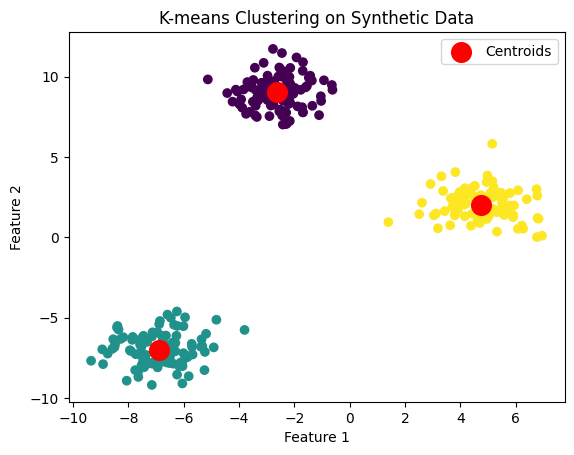

In [2]:
# Create a synthetic dataset with 3 clusters
X, _ = make_blobs(n_samples=300, centers=3, random_state=42)

# Apply K-means clustering
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

# Plot the clusters and centroids
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, cmap='viridis', marker='o')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', label='Centroids')
plt.title("K-means Clustering on Synthetic Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


This example demonstrates the Elbow Method, a technique to identify the optimal number of clusters in K-means by plotting the within-cluster sum of squares (WCSS) for various values of $k$.  We select the $k$ at the "elbow" point, where adding more clusters yields diminishing returns in WCSS reduction.

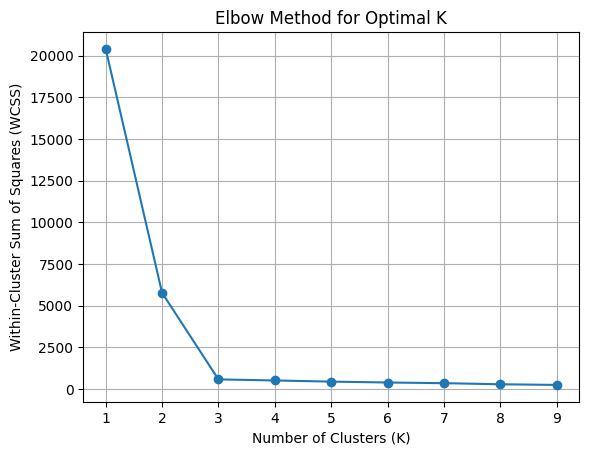

In [3]:
# Elbow method to find the optimal number of clusters
wcss = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot WCSS vs. number of clusters
plt.plot(range(1, 10), wcss, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Within-Cluster Sum of Squares (WCSS)")
plt.grid(True)
plt.show()


This example implements an example demonstrated at datacamp.com.  We cluster California housing data.  We use a silhouette score to determine the number of clusters.  Similar to the elbow method example above, we display a plot showing the score of probable clusters (lower is better using this method).  Finally, we display the data spread across the 5 suggested clusters.

https://www.datacamp.com/tutorial/k-means-clustering-python

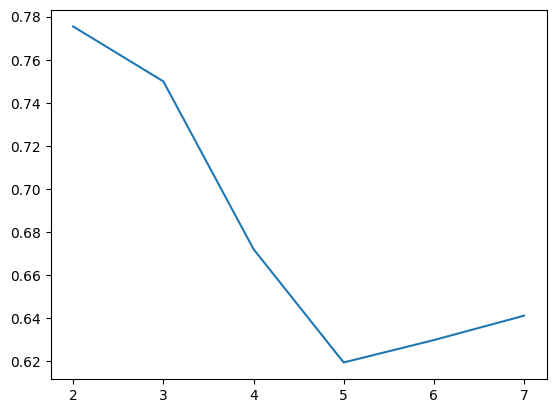

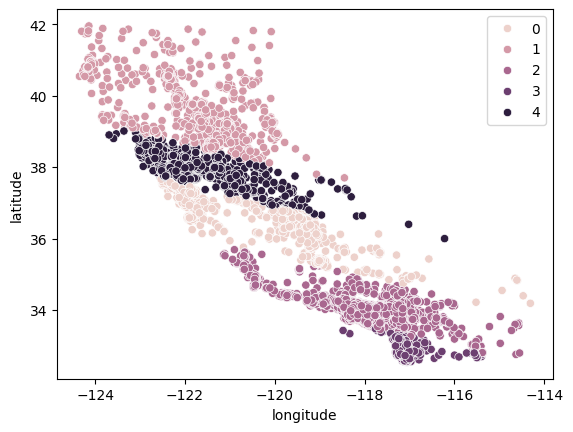

In [4]:
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

from sklearn.metrics import silhouette_score

home_data = pd.read_csv('DATA/housing.csv', usecols = ['longitude', 'latitude', 'median_house_value'])
home_data.head()

X_train, X_test, y_train, y_test = train_test_split(home_data[['latitude', 'longitude']], home_data[['median_house_value']], test_size=0.33, random_state=0)

#sns.scatterplot(data = home_data, x = 'longitude', y = 'latitude', hue = 'median_house_value')

X_train_norm = preprocessing.normalize(X_train)
X_test_norm = preprocessing.normalize(X_test)

kmeans = KMeans(n_clusters = 3, random_state = 0, n_init='auto')
kmeans.fit(X_train_norm)

#sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = kmeans.labels_)

#sns.boxplot(x = kmeans.labels_, y = y_train['median_house_value'])
silhouette_score(X_train_norm, kmeans.labels_, metric='euclidean')

K = range(2, 8)
fits = []
score = []


for k in K:
    # train the model for current value of k on training data
    model = KMeans(n_clusters = k, random_state = 0, n_init='auto').fit(X_train_norm)

    # append the model to fits
    fits.append(model)

    # Append the silhouette score to scores
    score.append(silhouette_score(X_train_norm, model.labels_, metric='euclidean'))

#sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[0].labels_)
#sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)
#sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[2].labels_)

sns.lineplot(x = K, y = score)
plt.show()

sns.scatterplot(data = X_train, x = 'longitude', y = 'latitude', hue = fits[3].labels_)
plt.show()
#sns.boxplot(x = fits[3].labels_, y = y_train['median_house_value'])

# **3.6. Support vector machine**

The class notes state that support-vector machines (SVMs) are supervised learning models in machine learning, which aim to analyze data for classification and regression analy- sis. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other. The objective of the support vector machine algorithm is to find a hyperplane in a high dimensional space of the number of features that distinctly classifies the data points. An SVM maps training examples to points in space so as to maximize the width of the gap between the two categories. Predictions of new data are based on which side of the gap they fall.

The first example shows how to train an SVM classifier to separate two classes in a synthetic dataset. Using the linear kernel, we visualize the decision boundary that best separates the classes, highlighting support vectors that lie closest to the boundary.

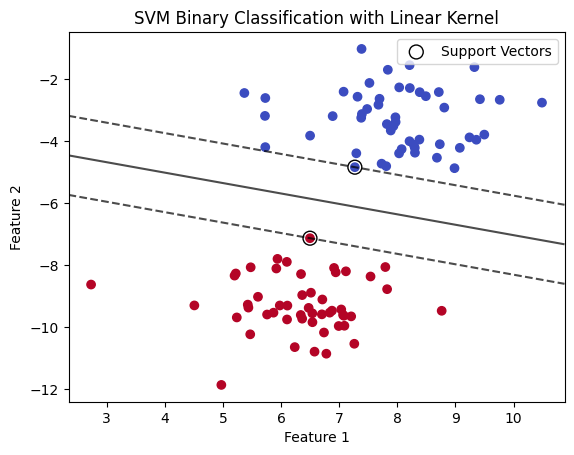

In [5]:
# Generate a synthetic dataset
X, y = make_blobs(n_samples=100, centers=2, random_state=6)

# Train an SVM model
svm = SVC(kernel='linear')
svm.fit(X, y)

# Plot the decision boundary and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', marker='o')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 30)
yy = np.linspace(ylim[0], ylim[1], 30)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7, linestyles=['--', '-', '--'])
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title("SVM Binary Classification with Linear Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


This example demonstrates SVM classification on a non-linearly separable dataset using the radial basis function (RBF) kernel, which allows SVM to create a nonlinear decision boundary. We visualize the separation achieved by the kernel trick.

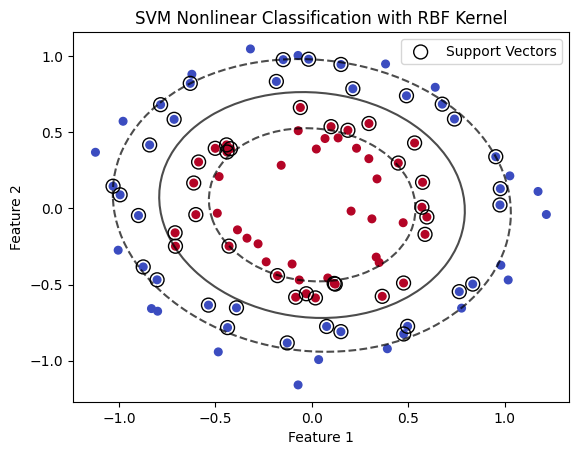

In [6]:
# Create a synthetic dataset with nonlinear clusters
X, y = make_circles(n_samples=100, factor=0.5, noise=0.1)

# Train an SVM model with RBF kernel
svm = SVC(kernel='rbf', gamma='auto')
svm.fit(X, y)

# Plot data points, decision boundary, and support vectors
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='coolwarm', s=30)
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Create grid to evaluate model
xx = np.linspace(xlim[0], xlim[1], 50)
yy = np.linspace(ylim[0], ylim[1], 50)
YY, XX = np.meshgrid(yy, xx)
xy = np.vstack([XX.ravel(), YY.ravel()]).T
Z = svm.decision_function(xy).reshape(XX.shape)

# Plot decision boundary and margins
ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1], alpha=0.7, linestyles=['--', '-', '--'])
ax.scatter(svm.support_vectors_[:, 0], svm.support_vectors_[:, 1], s=100, linewidth=1, facecolors='none', edgecolors='k', label='Support Vectors')
plt.title("SVM Nonlinear Classification with RBF Kernel")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()


In this example, we use the famous Iris dataset to classify iris species based on their features using Support Vector Machine (SVM). We train an SVM model with a linear kernel and visualize the decision boundaries for two selected features. The Iris dataset includes three species, so this example demonstrates multi-class classification using SVM.

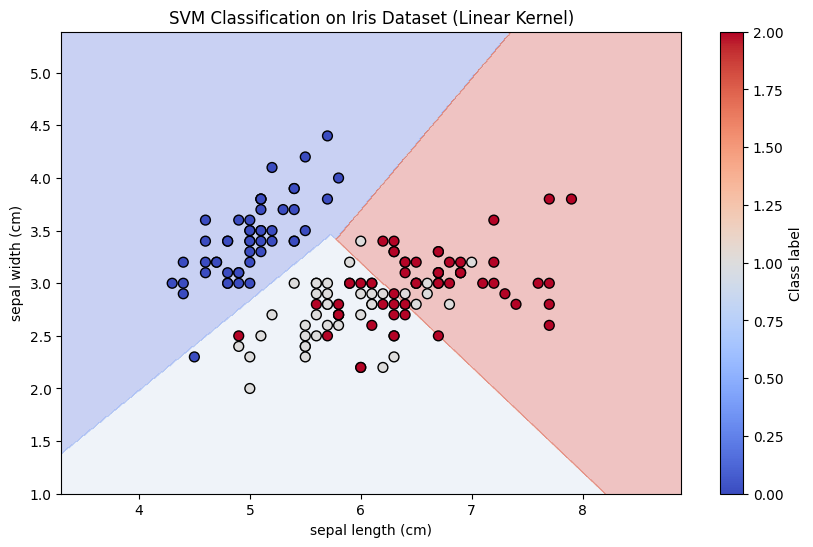

Test set accuracy: 73.33%


In [7]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Using only the first two features for visualization
y = iris.target

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features for better performance
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train an SVM model with a linear kernel
svm = SVC(kernel='linear', C=1, decision_function_shape='ovr')  # ovr = one-vs-rest for multi-class
svm.fit(X_train, y_train)

# Plot the decision boundaries
plt.figure(figsize=(10, 6))
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
Z = svm.predict(scaler.transform(np.c_[xx.ravel(), yy.ravel()]))
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap='coolwarm', marker='o', s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("SVM Classification on Iris Dataset (Linear Kernel)")
plt.colorbar(label="Class label")
plt.show()

# Evaluate the model on the test set
accuracy = svm.score(X_test, y_test)
print(f"Test set accuracy: {accuracy * 100:.2f}%")
